In [4]:
# Importing required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [5]:
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# 2. Preprocess the data
# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-hot encoding the target labels (because it's a classification problem)
y = to_categorical(y, 3)  # 3 classes in Iris dataset

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Build the ANN model
model = Sequential()

In [6]:
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer with ReLU activation
model.add(Dense(8, activation='relu'))  # Second hidden layer with ReLU activation
# Output layer (3 units, one for each class in the target variable)
model.add(Dense(3, activation='softmax'))  # Softmax for multi-class classification
# 4. Compile the model
model.compile(loss='categorical_crossentropy',  # Cross-entropy loss for multi-class classification
              optimizer='adam',  # Adam optimizer
              metrics=['accuracy'])  # Accuracy metric

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))
# 6. Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy on test data: {accuracy * 100:.2f}%')

# Predicting with the trained model
y_pred = model.predict(X_test)
print("Predictions on test data:")
print(np.argmax(y_pred, axis=1))  # Get the class index with the highest probability

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 254ms/step - accuracy: 0.2675 - loss: 1.2233 - val_accuracy: 0.4222 - val_loss: 1.0624
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2602 - loss: 1.2059 - val_accuracy: 0.4667 - val_loss: 1.0258
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3662 - loss: 1.0656 - val_accuracy: 0.4667 - val_loss: 0.9885
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4297 - loss: 1.0121 - val_accuracy: 0.4889 - val_loss: 0.9499
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3230 - loss: 1.0637 - val_accuracy: 0.5556 - val_loss: 0.9133
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4821 - loss: 0.9915 - val_accuracy: 0.6222 - val_loss: 0.8758
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5175 - loss: 1.0043 - val_accuracy: 0.6667 - val_loss: 0.8402
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6940 - loss: 0.8562 - val_accuracy: 0.7111 - 

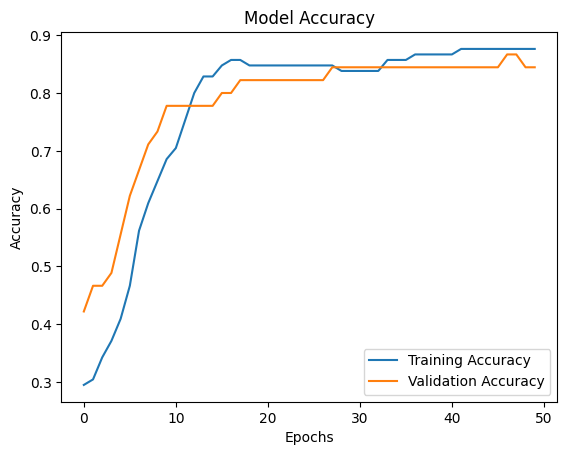

In [8]:
# You can also plot the training history if needed
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
